Tutorial for Reading DEM (digital elevation model) data into a matplotlib plot - created December 5

### 1
Download DEM data

For Washington State 10m data:
http://gis.ess.washington.edu/data/raster/tenmeter/byquad/index.html
1. select area (ex: Yakima)
2. you will be taken into the files for that area, click on a square on the map to download the dem file. Or, scroll down and click the "DNR number" for the area you want to download it.
3. unzip the dem file


### 2
Imports and DEM to TIFF

In [1]:
#import things
import numpy as np #numpy for math
import rasterio as rio #rasterio for reading in DEM
from rasterio.plot import show #for plotting with rio
import matplotlib.pyplot as plt #for plotting (base of plotting)
from pyproj import Proj,transform,Geod #for plotting on DEM
import pandas as pd #pandas for reading in csvs when plotting locations

A cell will be added here with how to convert from .dem to .tif

and how to merge .dem files

for now, I used ArcGIS, see instructions in DEM_notes.txt for now

### 3
Open and Show DEM (from .tif file)

In [ ]:
dem = rio.open("/home/smocz/expand_redpy_new_files/DEM_data/Rainier.tif") #open tif file (contains DEM) with rio
dem_array = dem.read(1).astype('float64') #set array for DEM
crs = dem.crs #get crs (coordinate reference systems)
dem_data_dict={'data':dem_array, 'crs':crs, 'left':dem.bounds[0], 'right':dem.bounds[2], 'bottom':dem.bounds[1], 'top':dem.bounds[3]}

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,12)) #make plot

show(dem_array, cmap='Greys_r', ax=ax) #show DEM, color map, ax is default
plt.axis() #show axis, put 'off' inside parenthesis to get rid of axis
plt.show() #show plot

### 4
Plot Points in lat, lon on the DEM

In [4]:
#transform locations and stations to UTM, takes a while so its in the outside cell

center_lat = 46.8528857
center_lon = -121.7603744

#get data for conversion and units
crs = dem_data_dict['crs'] #get crs
data = dem_data_dict['data'] #get data
# p2 = Proj(crs,preserve_units=False) #set up crs
# p1 = Proj(proj='latlong',preserve_units=False) #set up for latlong

#pull in location and stations to plot
loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/Rainier_Template_Locations.csv') #get locations
loc_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
loc_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations

volc_md = pd.read_csv(f'/home/smocz/expand_redpy/csv_catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='Rainier']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='Rainier']['Longitude'].values.tolist() #get latitude for stations at this volcano

# loc_eastings = [] #eastings for locations, from longitude
# loc_northings = [] #northings for locations, from latitude
# stas_eastings = [] #eastings for stations, from longitude
# stas_northings = [] #northings for stations, from latitude
# for ll,l in enumerate(loc_lats):
# #     print(f' loc lon_lat: {loc_lons[ll]}, {l}')
#     loc_easting, loc_northing = transform(p1,p2,loc_lons[ll],l) #transform center of volcano to UTM
# #     print(f' loc UTM: {loc_easting}, {loc_northing}')
#     loc_eastings.append(loc_easting) #append to list
#     loc_northings.append(loc_northing) #append to list
# #     break
# for ll,l in enumerate(stas_lats):
#     sta_easting, sta_northing = transform(p1,p2,stas_lons[ll],l) #transform center of volcano to UTM
#     stas_eastings.append(sta_easting) #append to list
#     stas_northings.append(sta_northing) #append to list

In [ ]:
# lat = 46.814988 #latitude of lower left corner
# lon = -121.816528 #longitude of lower left corner
length = 8e3 #length in m for the edges of the graph
center_lat = 46.8528857
center_lon = -121.7603744


# left_x,bottom_y = transform(p1,p2,lon,lat) #transform lower left corner to UTM
center_eastings, center_northings = transform(p1,p2,center_lon,center_lat) #transform center of volcano to UTM

left, right = dem_data_dict['left'],dem_data_dict['right']
bottom, top = dem_data_dict['bottom'],dem_data_dict['top']
print(f'left: {left} | right: {right} | bottom: {bottom} | top: {top}')
print(f'center in UTM: {center_eastings}, {center_northings}')

fig,ax = plt.subplots(1,1,figsize=(8,11))
ax.imshow(data,extent=[left, right, bottom, top],cmap='gist_earth')
ax.set_title('Rainier')
ax.scatter(center_eastings, center_northings,marker='*',color='blue',s=100,label='Volcano Center')
ax.scatter(loc_eastings, loc_northings,marker='.',color='green',alpha=0.5,label='Template Locations')
ax.scatter(stas_eastings, stas_northings,marker='o',color='orange',label='Stations')


#crop/zoom-in on map
# ax.set_xlim(left+2000,right-2500)
# ax.set_ylim(bottom+0.005e6,top-0.01e6)

In [ ]:
print('min lat:',min(stas_lats),'max lat:',max(stas_lats))
print('min lon:',min(stas_lons),'max lon:',max(stas_lons))

attempt at using .tif form gmrt.org

In [2]:
dem = rio.open("/home/smocz/expand_redpy_new_files/DEM_data/Rainier_bigger.tif") #open tif file (contains DEM) with rio
dem_array = dem.read(1).astype('float64') #set array for DEM
crs = dem.crs #get crs (coordinate reference systems)
dem_data_dict={'data':dem_array, 'crs':crs, 'left':dem.bounds[0], 'right':dem.bounds[2], 'bottom':dem.bounds[1], 'top':dem.bounds[3]}

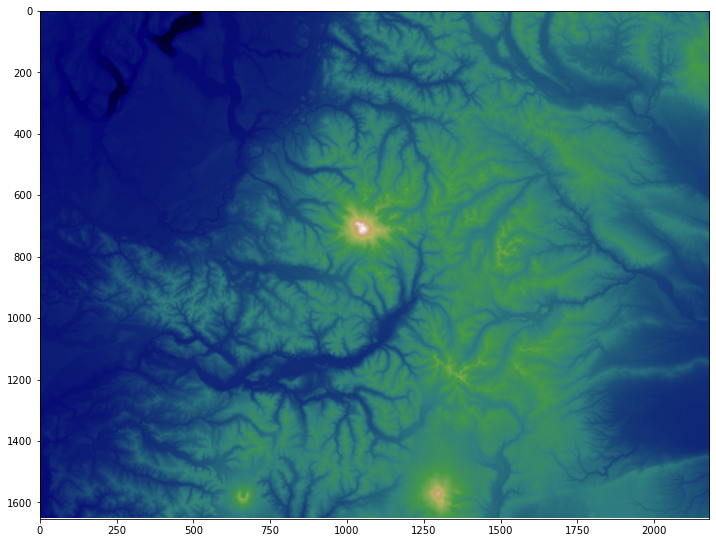

In [3]:
fig, ax = plt.subplots(1, figsize=(12,12)) #make plot

show(dem_array, cmap='gist_earth', ax=ax) #show DEM, color map, ax is default

plt.axis() #show axis, put 'off' inside parenthesis to get rid of axis
plt.show() #show plot

left: -122.9155886310019 | right: -120.5194699627481 | bottom: 46.142167466945274 | top: 47.387569579676644
center: -121.7603744, 46.8528857


(46.44216746694527, 47.137569579676644)

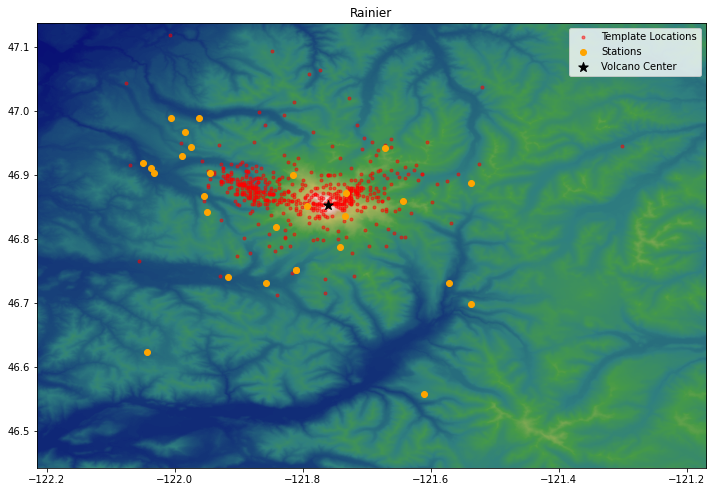

In [25]:
# lat = 46.814988 #latitude of lower left corner
# lon = -121.816528 #longitude of lower left corner
length = 8e3 #length in m for the edges of the graph
center_lat = 46.8528857
center_lon = -121.7603744


# left_x,bottom_y = transform(p1,p2,lon,lat) #transform lower left corner to UTM
# center_eastings, center_northings = transform(p1,p2,center_lon,center_lat) #transform center of volcano to UTM

left, right = dem_data_dict['left'],dem_data_dict['right']
bottom, top = dem_data_dict['bottom'],dem_data_dict['top']
print(f'left: {left} | right: {right} | bottom: {bottom} | top: {top}')
print(f'center: {center_lon}, {center_lat}')

fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.imshow(data,extent=[left, right, bottom, top],cmap='gist_earth')
ax.set_title('Rainier')
ax.scatter(loc_lons, loc_lats,marker='.',color='red',alpha=0.5,label='Template Locations')
ax.scatter(stas_lons, stas_lats,marker='o',color='orange',label='Stations')
ax.scatter(center_lon, center_lat,marker='*',color='black',s=100,label='Volcano Center')
ax.legend()

#crop/zoom-in on map
ax.set_xlim(left+.7,right-.65)
ax.set_ylim(bottom+0.3,top-0.25)


### ISSUE: IT SQUISHES WITH THE DIMENSIONS
### THE SCATTERS ALINE WITH THE AXES, THE MAP DOES NOT